<img src="https://prnewswire2-a.akamaihd.net/p/1893751/sp/189375100/thumbnail/entry_id/1_su9da4fu/def_height/1001/def_width/1911/version/100011/type/2/q/100"  width="300" height="200">

# Exploratory Data Analysis

Let's create a roadmap for Data Analysis.
- Plot the distributions of each feature and `logerror`.
- Plot the interactions each feature and the target variable, `logerror`.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from prepare import prepare_zillow

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = prepare_zillow()

In [3]:
print(df.shape)
df.head()

(52439, 23)


,parcelid,num_of_bedrooms,num_of_restrooms,living_room_area_sqft,lot_size_sqft,year_built,has_basement,has_hottub_or_spa,has_pool,pool_area_sqft,...,basement_area_sqft,property_tax,structure_tax,land_tax,taxable_value,date_sold,fips,latitude,longitude,logerror
0,10711855,3.0,2.0,2107.0,9158.0,1972,0,0,1,0.0,...,0.0,7659.36,249655.0,374484.0,624139.0,2017-07-07,6037,34222559.0,-118617387.0,-0.007357
1,10711877,4.0,2.0,1882.0,9035.0,1972,0,0,1,0.0,...,0.0,8123.91,253000.0,407000.0,660000.0,2017-08-29,6037,34220261.0,-118616409.0,0.021066
2,10711888,4.0,2.0,1882.0,9800.0,1972,0,0,0,0.0,...,0.0,6673.24,257591.0,285332.0,542923.0,2017-04-04,6037,34222491.0,-118616854.0,0.077174
3,10711910,3.0,2.0,1477.0,11285.0,1960,0,0,1,0.0,...,0.0,1116.46,57968.0,20063.0,78031.0,2017-03-17,6037,34221864.0,-118615739.0,-0.041238
4,10711923,4.0,2.0,1918.0,11239.0,1960,0,0,1,0.0,...,0.0,5239.85,167869.0,247590.0,415459.0,2017-03-24,6037,34220619.0,-118615253.0,-0.009496


In [4]:
df.nunique()

parcelid                 52320
num_of_bedrooms             13
num_of_restrooms            21
living_room_area_sqft     4723
lot_size_sqft            14293
year_built                 133
has_basement                 2
has_hottub_or_spa            2
has_pool                     2
pool_area_sqft             263
has_patio                    2
patio_area_sqft            505
has_shed                     2
basement_area_sqft          58
property_tax             50834
structure_tax            37333
land_tax                 36913
taxable_value            38942
date_sold                  258
fips                         3
latitude                 50478
longitude                50764
logerror                 52180
dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
parcelid,52439.0,1.299618e+07,3.348015e+06,1.071186e+07,1.151021e+07,1.257748e+07,1.412945e+07,1.676878e+08
num_of_bedrooms,52439.0,3.308492e+00,9.340809e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,1.400000e+01
num_of_restrooms,52439.0,2.303915e+00,1.016746e+00,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.800000e+01
living_room_area_sqft,52439.0,1.922477e+03,1.003649e+03,1.280000e+02,1.268000e+03,1.659000e+03,2.304000e+03,2.192900e+04
lot_size_sqft,52439.0,1.130816e+04,8.644435e+04,2.360000e+02,5.599000e+03,6.840500e+03,8.764000e+03,6.971010e+06
year_built,52439.0,1.963388e+03,2.310790e+01,1.878000e+03,1.950000e+03,1.961000e+03,1.979000e+03,2.016000e+03
has_basement,52439.0,8.962795e-04,2.992479e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
has_hottub_or_spa,52439.0,2.889071e-02,1.675010e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
has_pool,52439.0,2.115982e-01,4.084454e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
pool_area_sqft,52439.0,8.569614e+00,6.908511e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+03


# Distributions of each feature

Let's check out the distributions of each feature.
1. Distributions of Geography Features
2. Distributions of Home Features
3. Distributions of Tax Features

In [6]:
geo_features = ['fips', 'latitude', 'longitude', 'logerror']


home_features = ['parcelid',
                 'num_of_bedrooms',
                 'num_of_restrooms',
                 'living_room_area_sqft',
                 'lot_size_sqft',
                 'year_built',
                 'has_basement',
                 'has_hottub_or_spa',
                 'has_pool',
                 'pool_area_sqft',
                 'has_patio',
                 'patio_area_sqft',
                 'has_shed',
                 'basement_area_sqft',
                 'logerror']

tax_features = ['property_tax',
                'structure_tax',
                'land_tax',
                'taxable_value',
                'logerror']

In [19]:
distributions = df.copy()

# drop the date column for now
distributions.drop(columns='date_sold', inplace=True)

## Distributions of Geography features
Let's start with a birds eye view of our data:<br>
latitude, longitutde, fips, logerror

In [9]:
# filter our dataset for geographic features
geo_dists = distributions[geo_features].copy()

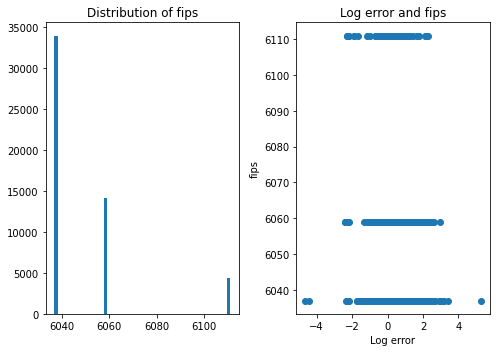

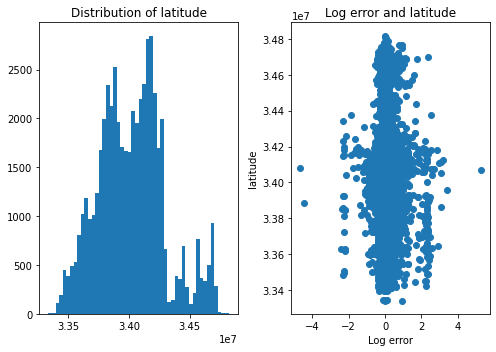

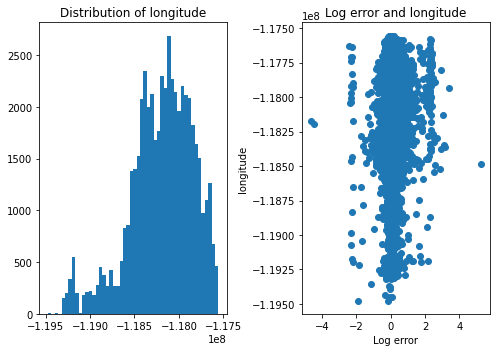

In [10]:
for i in geo_dists.columns[:-1]:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7,5))
    fig.subplots_adjust(left=None, bottom=0.1, right=0.9, top=0.9, wspace=0.9, hspace=0.2)
    ax1.hist(geo_dists[i], bins=50)
    ax2.scatter(geo_dists.logerror, geo_dists[i])
    ax1.title.set_text(f'Distribution of {i}')
    ax2.title.set_text(f'Log error and {i}')
    ax2.set_xlabel('Log error')
    ax2.set_ylabel(f'{i}')
    plt.tight_layout()
    plt.show()

### Takeaways: Distributions of Geography Features
- Fips 6037 contains the most properties in the dataset followed by fips 6059, and fips 6111.
- The largest logerrors occur in fips 6037 - Los Angeles
---
## Distributions of Home Features

Let's take a look at our properties

In [11]:
home_dists = distributions[home_features].copy()

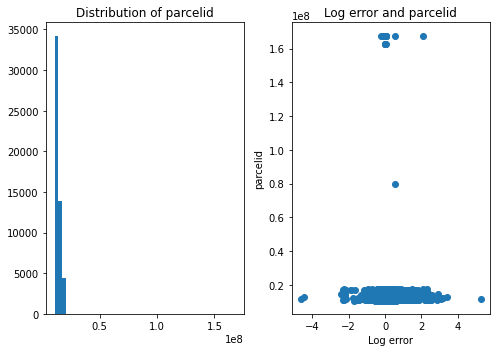

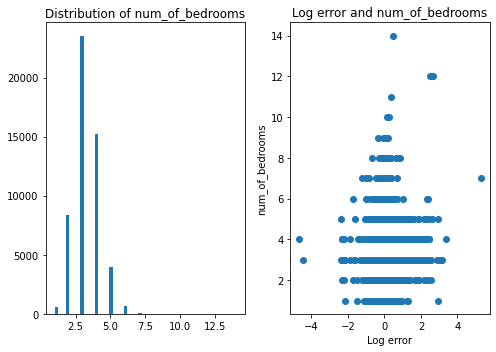

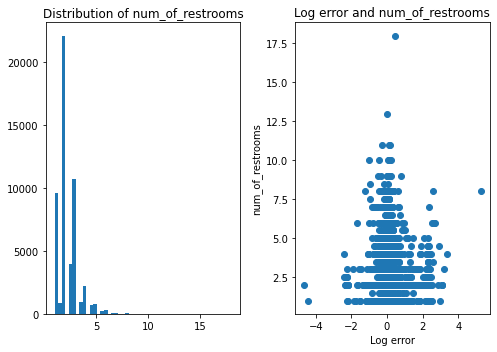

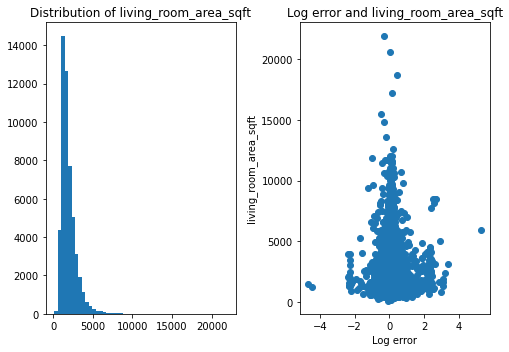

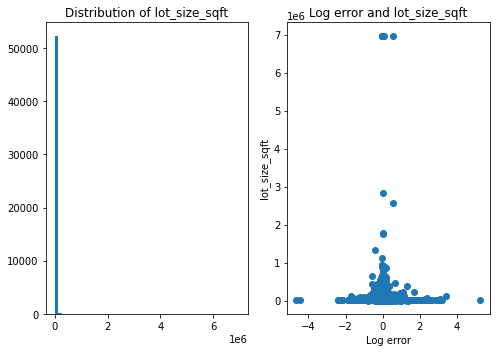

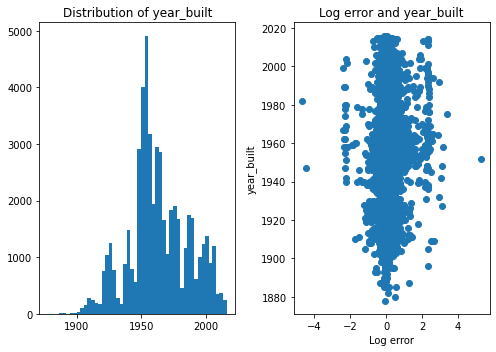

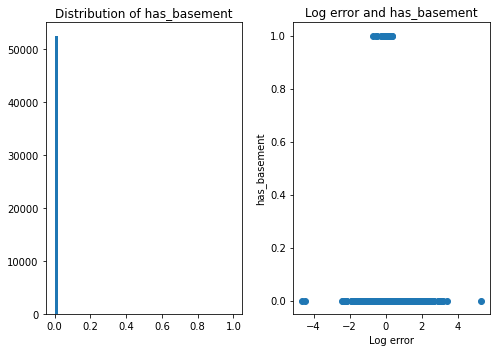

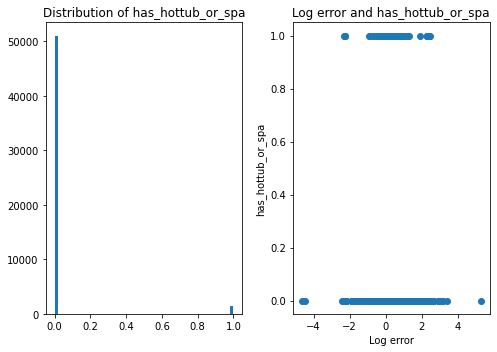

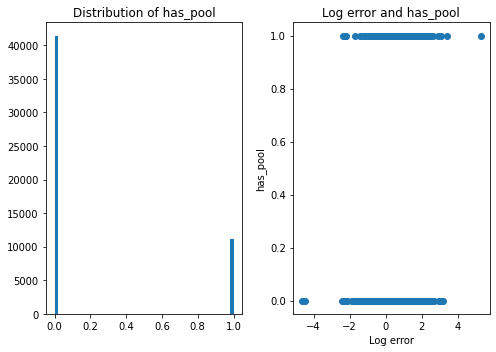

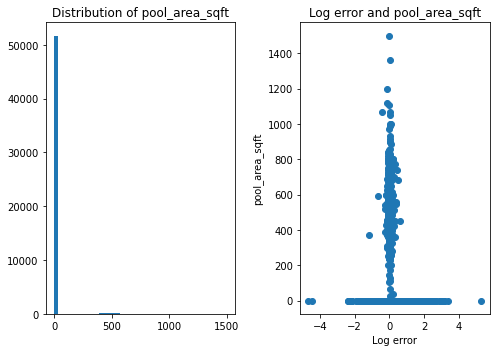

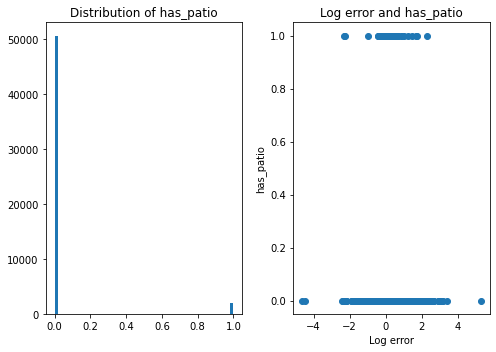

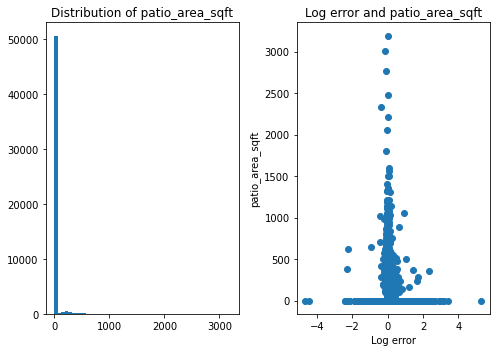

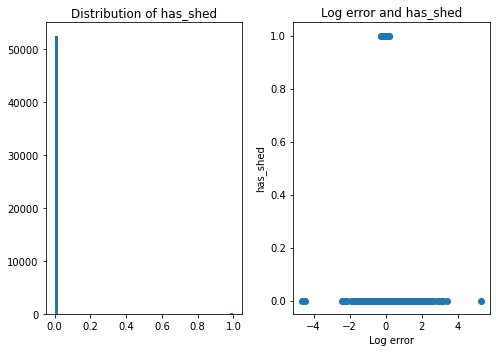

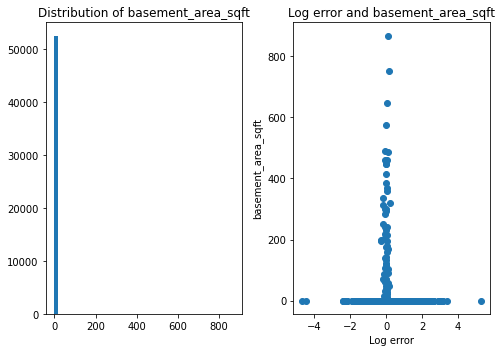

In [12]:
for i in home_dists.columns[:-1]:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7,5))
    fig.subplots_adjust(left=None, bottom=0.1, right=0.9, top=0.9, wspace=0.9, hspace=0.2)
    ax1.hist(home_dists[i], bins=50)
    ax2.scatter(home_dists.logerror, home_dists[i])
    ax1.title.set_text(f'Distribution of {i}')
    ax2.title.set_text(f'Log error and {i}')
    ax2.set_xlabel('Log error')
    ax2.set_ylabel(f'{i}')
    plt.tight_layout()
    plt.show()

### Takeaways: Distributions of Home Features

## Distributions of Tax Features

In [13]:
tax_dists = distributions[tax_features].copy()

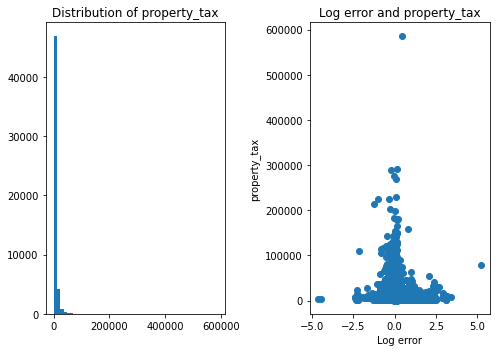

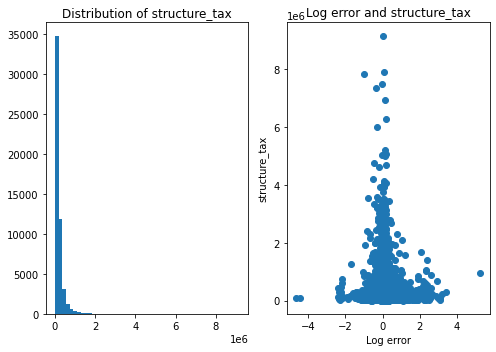

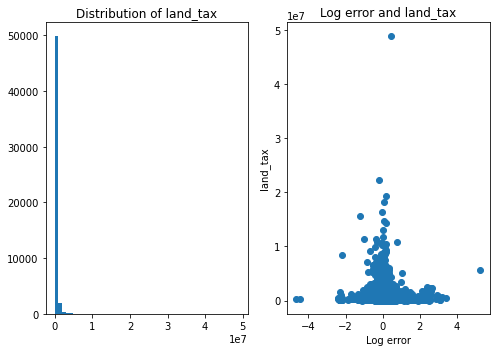

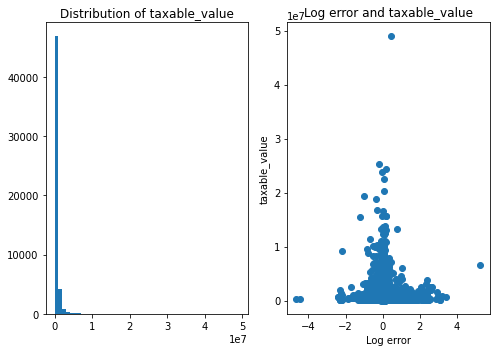

In [14]:
for i in tax_dists.columns[:-1]:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7,5))
    fig.subplots_adjust(left=None, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2)
    ax1.hist(tax_dists[i], bins=50)
    ax2.scatter(tax_dists.logerror, tax_dists[i])
    ax1.title.set_text(f'Distribution of {i}')
    ax2.title.set_text(f'Log error and {i}')
    ax2.set_xlabel('Log error')
    ax2.set_ylabel(f'{i}')
    plt.tight_layout()
    plt.show()

### Takeaways: Distributions of Home Features

---
# Interactions between features and `logerror`

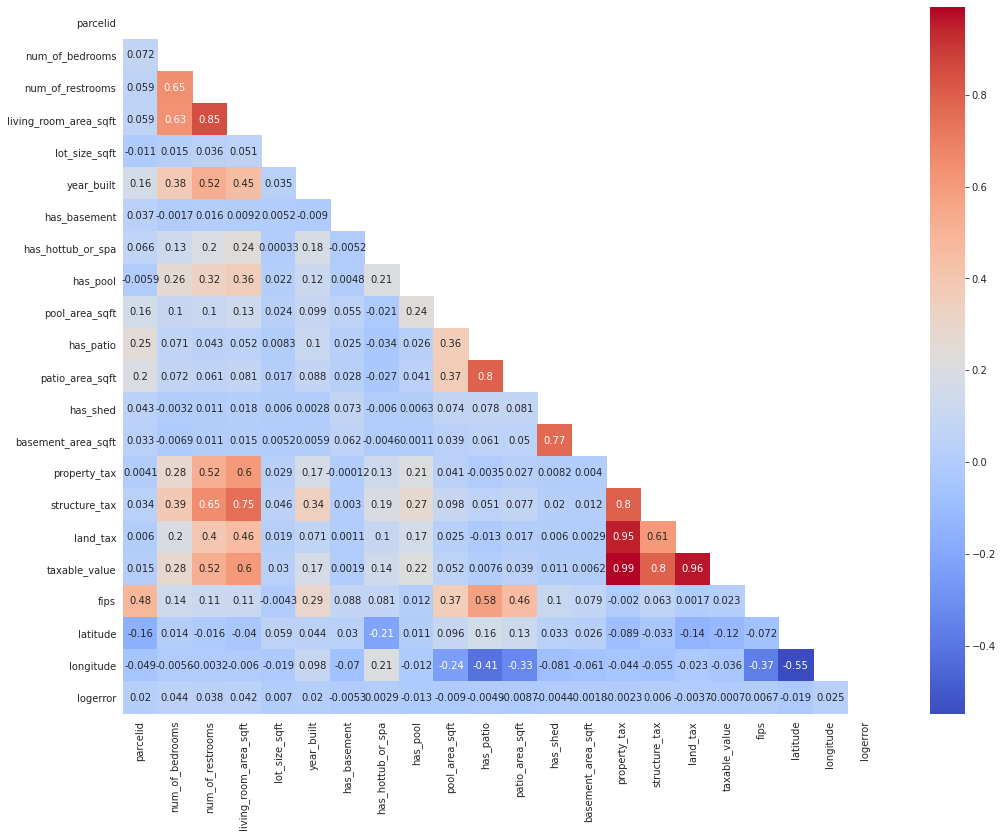

In [15]:
correlations = df.corr()
mask = np.zeros_like(correlations)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):

    f, ax = plt.subplots(figsize=(17, 13))
    ax = sns.heatmap(correlations,
                     mask=mask,
                     annot=True,
                     fmt='.2',
                     cmap='coolwarm'
                    )   

In [16]:
correlations[['logerror']].sort_values(by='logerror', ascending=False)[1:]

,logerror
num_of_bedrooms,0.043937
living_room_area_sqft,0.042262
num_of_restrooms,0.038003
longitude,0.025363
year_built,0.020201
parcelid,0.019940
lot_size_sqft,0.006960
fips,0.006740
structure_tax,0.006032
has_hottub_or_spa,0.002890


# Appendix

In [17]:
# Categorical values
categorical_features = df.nunique()[df.nunique() < 22].index.to_list()
numerical_features = df.drop(columns=categorical_features).columns.to_list()

In [18]:
df_categorical_features = df[categorical_features]
df_numerical_features = df[numerical_features]

```python
for i in distributions.columns:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7,5))
    fig.subplots_adjust(left=None, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2)
    ax1.hist(distributions[i], bins=50)
    ax2.scatter(distributions.logerror, distributions[i])
    ax1.title.set_text(f'Distribution of {i}')
    ax2.title.set_text(f'Log error and {i}')
    ax2.set_xlabel('Log error')
    ax2.set_ylabel(f'{i}')
    plt.tight_layout()
    plt.show()
```

[zillow-zestimate](https://www.zillow.com/zestimate/)

Notes:
`The Zestimate® home valuation model is Zillow’s estimate of a home's market value. The Zestimate incorporates public and user-submitted data, taking into account home facts, location and market conditions.`

`It is not an appraisal and it should be used as a starting point. We encourage buyers, sellers and homeowners to supplement the Zestimate with other research such as visiting the home, getting a professional appraisal of the home, or requesting a comparative market analysis (CMA) from a real estate agent.`

`The amount of data we have for your home and homes in your area directly affects the Zestimate's accuracy. If the data is incorrect or incomplete, update your home facts — this may affect your Zestimate.`    
    
`The Zestimate was created to give consumers more information about homes and the housing market. It is intended to provide user-friendly data to promote transparent real estate markets and allow people to make more informed decisions — it should not be used to drive up the price of a home. Zestimates are designed to track the market, not drive it.`
    
`The Zestimate is not an appraisal and can't be used in place of an appraisal. It is a computer-generated estimate of the value of a home today, given the available data.`

`Note: The Zestimate's accuracy is computed by comparing the final sale price to the Zestimate that was published on or just prior to the sale date.`

`Median Error:
    The nationwide median error rate for the Zestimate for on-market homes is 1.9%, while the Zestimate for off-market homes has a median error rate of 7.5%. This means that the Zestimates for half of all on-market homes are within 2% of the selling price, and half are not. For most major markets, the Zestimate for on-market homes is within 10% of the final sale price more than 95% of the time.`